In [2]:
import re
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
nltk.download('punkt')

# Function to read and preprocess text
def read_and_preprocess(files):
    corpus = []
    for file in files:
        with open(file, 'r') as f:
            for i in range(150):
                line = f.readline().strip().lower()
                if not line:  # Stop if the end of the file is reached before reading num_lines
                    break
                # Remove punctuation
                line = re.sub(r'[^\w\s]', '', line)
                # Tokenize
                tokens = word_tokenize(line)
                corpus.extend(tokens)
    return corpus

# Specify the files for the seven books
files = ['HarryPotter/HP1.txt']
#, 'HarryPotter/HP3.txt', 'HarryPotter/HP4.txt', 'HarryPotter/HP5.txt', 'HarryPotter/HP6.txt', 'HarryPotter/HP7.txt']
# Preprocess the text
corpus = read_and_preprocess(files)


2024-08-09 02:50:45.147386: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 02:50:45.147541: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 02:50:45.205875: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-09 02:50:45.329430: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-09 02:50:46.457826: W tensorflow/compiler/tf2

In [3]:
# Create vocabulary and mappings
unique_words = list(set(corpus))
word_to_idx = {word: i for i, word in enumerate(unique_words)}
idx_to_word = {i: word for i, word in enumerate(unique_words)}

# Label encoding for corpus
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(corpus)

# One-hot encoding for integer encoded corpus
onehot_encoder = OneHotEncoder(sparse_output=False, categories='auto')
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [4]:
# Create training data
def generate_training_data(corpus, word_to_idx, window_size):
    X, y = [], []
    for i in range(len(corpus)):
        target_word = word_to_idx[corpus[i]]
        context_words = []
        for j in range(-window_size, window_size + 1):
            if j == 0 or i + j < 0 or i + j >= len(corpus):
                continue
            context_word = word_to_idx[corpus[i + j]]
            context_words.append(context_word)
        X.extend([target_word] * len(context_words))
        y.extend(context_words)
    return np.array(X), np.array(y)

window_size = 1
X, y = generate_training_data(corpus, word_to_idx, window_size)


In [5]:
# Parameters
vocab_size = len(unique_words)
embedding_dim = 100  # Dimension of the embedding vectors

initializer = tf.keras.initializers.RandomNormal(mean=0.05, stddev=0.05)
# Define the model
input_layer = tf.keras.layers.Input(shape=(1,))
embedding_layer = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=1)(input_layer)
hidden_layer = tf.keras.layers.Dense(128, activation=None, kernel_initializer = initializer)(embedding_layer)
dropout_layer = tf.keras.layers.Dropout(0.5)(hidden_layer)
flatten_layer = tf.keras.layers.Flatten()(hidden_layer)
output_layer = tf.keras.layers.Dense(vocab_size, activation='softmax', kernel_initializer = initializer)(flatten_layer)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model.fit(X_train, y_train, epochs=50, batch_size=40, validation_data=(X_test, y_test))

print("Model training completed.")


2024-08-09 02:50:50.048492: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-09 02:50:50.246574: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-09 02:50:50.246688: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-09 02:50:50.251850: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-09 02:50:50.251961: I external/local_xla/xla/stream_executor

Epoch 1/50


2024-08-09 02:50:51.807452: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fc055e2ad20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-09 02:50:51.807502: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-08-09 02:50:51.835743: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-09 02:50:51.906384: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-08-09 02:50:52.063824: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
I0000 00:00:1723164652.177909  164766 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1284/1284 [==============================] - 11s 8ms/step - loss: 6.6700 - accuracy: 0.0550 - val_loss: 6.4333 - val_accuracy: 0.0713
Epoch 2/50
1284/1284 [==============================] - 11s 8ms/step - loss: 6.1670 - accuracy: 0.0865 - val_loss: 6.3033 - val_accuracy: 0.0902
Epoch 3/50
1284/1284 [==============================] - 10s 8ms/step - loss: 5.8784 - accuracy: 0.1098 - val_loss: 6.3024 - val_accuracy: 0.0940
Epoch 4/50
1284/1284 [==============================] - 11s 8ms/step - loss: 5.6329 - accuracy: 0.1212 - val_loss: 6.3313 - val_accuracy: 0.0975
Epoch 5/50
1284/1284 [==============================] - 11s 8ms/step - loss: 5.4005 - accuracy: 0.1305 - val_loss: 6.4089 - val_accuracy: 0.0979
Epoch 6/50
1284/1284 [==============================] - 11s 8ms/step - loss: 5.1805 - accuracy: 0.1372 - val_loss: 6.5246 - val_accuracy: 0.0981
Epoch 7/50
1284/1284 [==============================] - 11s 8ms/step - loss: 4.9836 - accuracy: 0.1415 - val_loss: 6.6424 - val_accuracy: 0.0

KeyboardInterrupt: 

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

# Create a model to extract embeddings
embedding_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(index=1).output)
embeddings = embedding_model.get_weights()[0]  # Get the weights of the embedding layer

# Function to get embedding for a word
def get_embedding(word):
    word_idx = word_to_idx[word]
    return embeddings[word_idx]

# Compute similarity between the target word and all other words
def get_most_similar_words(target_word, top_n=10):
    target_embedding = get_embedding(target_word)
    similarities = []
    
    for idx, word in idx_to_word.items():
        if word == target_word:
            continue
        word_embedding = embeddings[idx]
        similarity = cosine_similarity([target_embedding], [word_embedding])[0][0]
        similarities.append((word, similarity))
    
    # Sort by similarity
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
    return similarities[:top_n]

# Example usage
target_word = "harry"
top_related_words = get_most_similar_words(target_word, top_n=10)

print(f"Top related words to '{target_word}':")
for word, similarity in top_related_words:
    print(f"{word}: {similarity:.4f}")


Top related words to 'harry':
urgently: 0.4857
crockford: 0.4741
amazed: 0.4634
pin: 0.4478
sweating: 0.4317
mutely: 0.4232
musty: 0.4106
sparks: 0.4016
fattenin: 0.4009
afterward: 0.3925


In [7]:
from sklearn.metrics.pairwise import cosine_similarity

# Create a model to extract embeddings
embedding_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(index=1).output)
embeddings = embedding_model.get_weights()[0]  # Get the weights of the embedding layer

# Function to get embedding for a word
def get_embedding(word):
    word_idx = word_to_idx[word]
    return embeddings[word_idx]

# Compute similarity between the target word and all other words
def get_most_similar_words(target_word, top_n=10):
    target_embedding = get_embedding(target_word)
    similarities = []
    
    for idx, word in idx_to_word.items():
        if word == target_word:
            continue
        word_embedding = embeddings[idx]
        similarity = cosine_similarity([target_embedding], [word_embedding])[0][0]
        similarities.append((word, similarity))
    
    # Sort by similarity
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
    return similarities[:top_n]

# Example usage
target_word = "harry"
top_related_words = get_most_similar_words(target_word, top_n=20)

print(f"Top related words to '{target_word}':")
for word, similarity in top_related_words:
    print(f"{word}: {similarity:.4f}")


Top related words to 'harry':
urgently: 0.4857
crockford: 0.4741
amazed: 0.4634
pin: 0.4478
sweating: 0.4317
mutely: 0.4232
musty: 0.4106
sparks: 0.4016
fattenin: 0.4009
afterward: 0.3925
forever: 0.3878
pointing: 0.3823
wildly: 0.3796
foolish: 0.3794
intently: 0.3708
finnigan: 0.3636
security: 0.3610
fastenings: 0.3597
she: 0.3593
hagrid: 0.3577


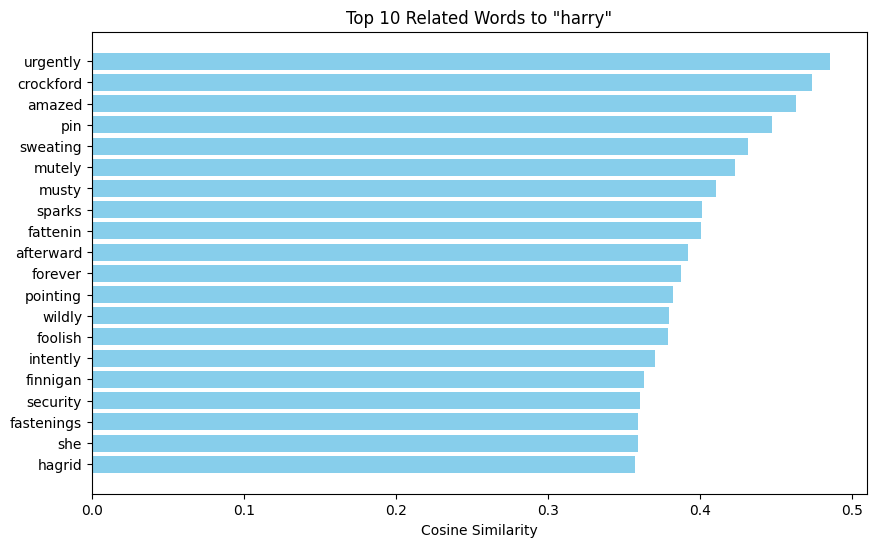

In [8]:
import matplotlib.pyplot as plt

# Plotting the results
words, similarities = zip(*top_related_words)

plt.figure(figsize=(10, 6))
plt.barh(words, similarities, color='skyblue')
plt.xlabel('Cosine Similarity')
plt.title(f'Top 10 Related Words to "{target_word}"')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest similarity on top
plt.show()


In [9]:
# Prepare data for t-SNE
words = [target_word] + [word for word, _ in top_related_words]
word_embeddings = np.array([get_embedding(word) for word in words])

# Apply t-SNE with adjusted perplexity
perplexity = min(30, len(words) - 1)  # Perplexity should be less than the number of samples
tsne = TSNE(n_components=3, perplexity=perplexity, random_state=42)
word_embeddings_3d = tsne.fit_transform(word_embeddings)

# Plot the t-SNE visualization
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for i, word in enumerate(words):
    ax.scatter(word_embeddings_3d[i, 0], word_embeddings_3d[i, 1], word_embeddings_3d[i, 2])
    ax.text(word_embeddings_3d[i, 0], word_embeddings_3d[i, 1], word_embeddings_3d[i, 2], word, fontsize=12)

ax.set_title('3D t-SNE visualization of word embeddings')
ax.set_xlabel('t-SNE dimension 1')
ax.set_ylabel('t-SNE dimension 2')
ax.set_zlabel('t-SNE dimension 3')
plt.show()

NameError: name 'TSNE' is not defined

## Increase window size

In [ ]:
# Create training data
def generate_training_data(corpus, word_to_idx, window_size):
    X, y = [], []
    for i in range(len(corpus)):
        target_word = word_to_idx[corpus[i]]
        context_words = []
        for j in range(-window_size, window_size + 1):
            if j == 0 or i + j < 0 or i + j >= len(corpus):
                continue
            context_word = word_to_idx[corpus[i + j]]
            context_words.append(context_word)
        X.extend([target_word] * len(context_words))
        y.extend(context_words)
    return np.array(X), np.array(y)

window_size = 5
X, y = generate_training_data(corpus, word_to_idx, window_size)


In [ ]:
# Parameters
vocab_size = len(unique_words)
embedding_dim = 100  # Dimension of the embedding vectors

# Define the model
input_layer = tf.keras.layers.Input(shape=(1,))
embedding_layer = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=1)(input_layer)
flatten_layer = tf.keras.layers.Flatten()(embedding_layer)
output_layer = tf.keras.layers.Dense(vocab_size, activation='softmax')(flatten_layer)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model.fit(X_train, y_train, epochs=50, batch_size=40, validation_data=(X_test, y_test))

print("Model training completed.")


/Users/manisha/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
245458/245458 ━━━━━━━━━━━━━━━━━━━━ 2626s 11ms/step - loss: 6.9183 - val_loss: 6.8295
Epoch 2/50
245454/245458 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.7729

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Create a model to extract embeddings
embedding_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(index=1).output)
embeddings = embedding_model.get_weights()[0]  # Get the weights of the embedding layer

# Function to get embedding for a word
def get_embedding(word):
    word_idx = word_to_idx[word]
    return embeddings[word_idx]

# Compute similarity between the target word and all other words
def get_most_similar_words(target_word, top_n=10):
    target_embedding = get_embedding(target_word)
    similarities = []
    
    for idx, word in idx_to_word.items():
        if word == target_word:
            continue
        word_embedding = embeddings[idx]
        similarity = cosine_similarity([target_embedding], [word_embedding])[0][0]
        similarities.append((word, similarity))
    
    # Sort by similarity
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
    return similarities[:top_n]

# Example usage
target_word = "harry"
top_related_words = get_most_similar_words(target_word, top_n=10)

print(f"Top related words to '{target_word}':")
for word, similarity in top_related_words:
    print(f"{word}: {similarity:.4f}")


In [ ]:
import matplotlib.pyplot as plt

# Plotting the results
words, similarities = zip(*top_related_words)

plt.figure(figsize=(10, 6))
plt.barh(words, similarities, color='skyblue')
plt.xlabel('Cosine Similarity')
plt.title(f'Top 10 Related Words to "{target_word}"')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest similarity on top
plt.show()


# Prepare data for t-SNE
words = [target_word] + [word for word, _ in top_related_words]
word_embeddings = np.array([get_embedding(word) for word in words])

# Apply t-SNE with adjusted perplexity
perplexity = min(30, len(words) - 1)  # Perplexity should be less than the number of samples
tsne = TSNE(n_components=3, perplexity=perplexity, random_state=42)
word_embeddings_3d = tsne.fit_transform(word_embeddings)

# Plot the t-SNE visualization
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for i, word in enumerate(words):
    ax.scatter(word_embeddings_3d[i, 0], word_embeddings_3d[i, 1], word_embeddings_3d[i, 2])
    ax.text(word_embeddings_3d[i, 0], word_embeddings_3d[i, 1], word_embeddings_3d[i, 2], word, fontsize=12)

ax.set_title('3D t-SNE visualization of word embeddings')
ax.set_xlabel('t-SNE dimension 1')
ax.set_ylabel('t-SNE dimension 2')
ax.set_zlabel('t-SNE dimension 3')
plt.show()